In [1]:
%load_ext autoreload
%autoreload 2
from pyMSOO.MFEA.model import AMFEA
from pyMSOO.utils.Crossover import *
from pyMSOO.utils.Mutation import *
from pyMSOO.utils.Selection import *
from pyMSOO.utils.Rmp import *
from pyMSOO.MFEA.benchmark.continous import *
from pyMSOO.utils.MultiRun.RunMultiTime import * 
import warnings
warnings.filterwarnings('ignore')

random percent: 0
random percent: 0
I am using the MFEA algorithm to optimize several different tasks. Help me generate 4 different guide lines to construct a Random Mating Probability (RMP) matrix using the following information:
You are given the following input information:
- 'task_count': The number of tasks.
- 'pop_mean': A matrix of shape (task_count, indi_len), where each row represents the mean vector of the population for each task. It describes the average position of individuals in the search space per task.
- 'pop_variance': A matrix of shape (task_count, indi_len), where each row represents the per-dimension variance of individuals in the population of each task. It describes the spread or diversity within each task.
Each guide line should:
- Use these statistics to assess **the similarity or difference between tasks** in terms of distribution in the search space.
- Propose how RMP values between task pairs should be adjusted accordingly.
- Be logically sound, non-trivial,

In [2]:

tasks, IndClass = CEC17_benchmark.get_10tasks_benchmark()
# tasks, IndClass = GNBG_benchmark.get_multitask_benchmark(1)
baseModel = AMFEA.model()
baseModel.compile(
	IndClass= IndClass,
	tasks= tasks,
	crossover= SBX_Crossover(nc = 2),
	mutation= PolynomialMutation(nm = 5),
	selection= ElitismSelection()
)
solve = baseModel.fit(
	nb_generations=1000, nb_inds_each_task=100, 
	bound_pop= [0, 1], evaluate_initial_skillFactor=True
)

random percent: 0
Seed: None -- Time: 00m 0.64s    0 % [>                   ]  Cost: 1.07570E+05  2.40119E+05  2.91887E+05  3.70890E+01  2.78952E+09  2.13383E+01  8.07210E+01  1.60737E+04  7.87520E+01  7.93618E+04  ,  Error decoding JSON: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)
Seed: None -- Time: 11m 55.12s  100 % [====================>]  Cost: 1.21469E-02  6.94398E-04  2.13645E-04  6.26163E-02  1.20161E+00  7.97366E-03  1.34198E-01  2.91109E-01  9.05239E-04  6.66483E+00  ,  
END!


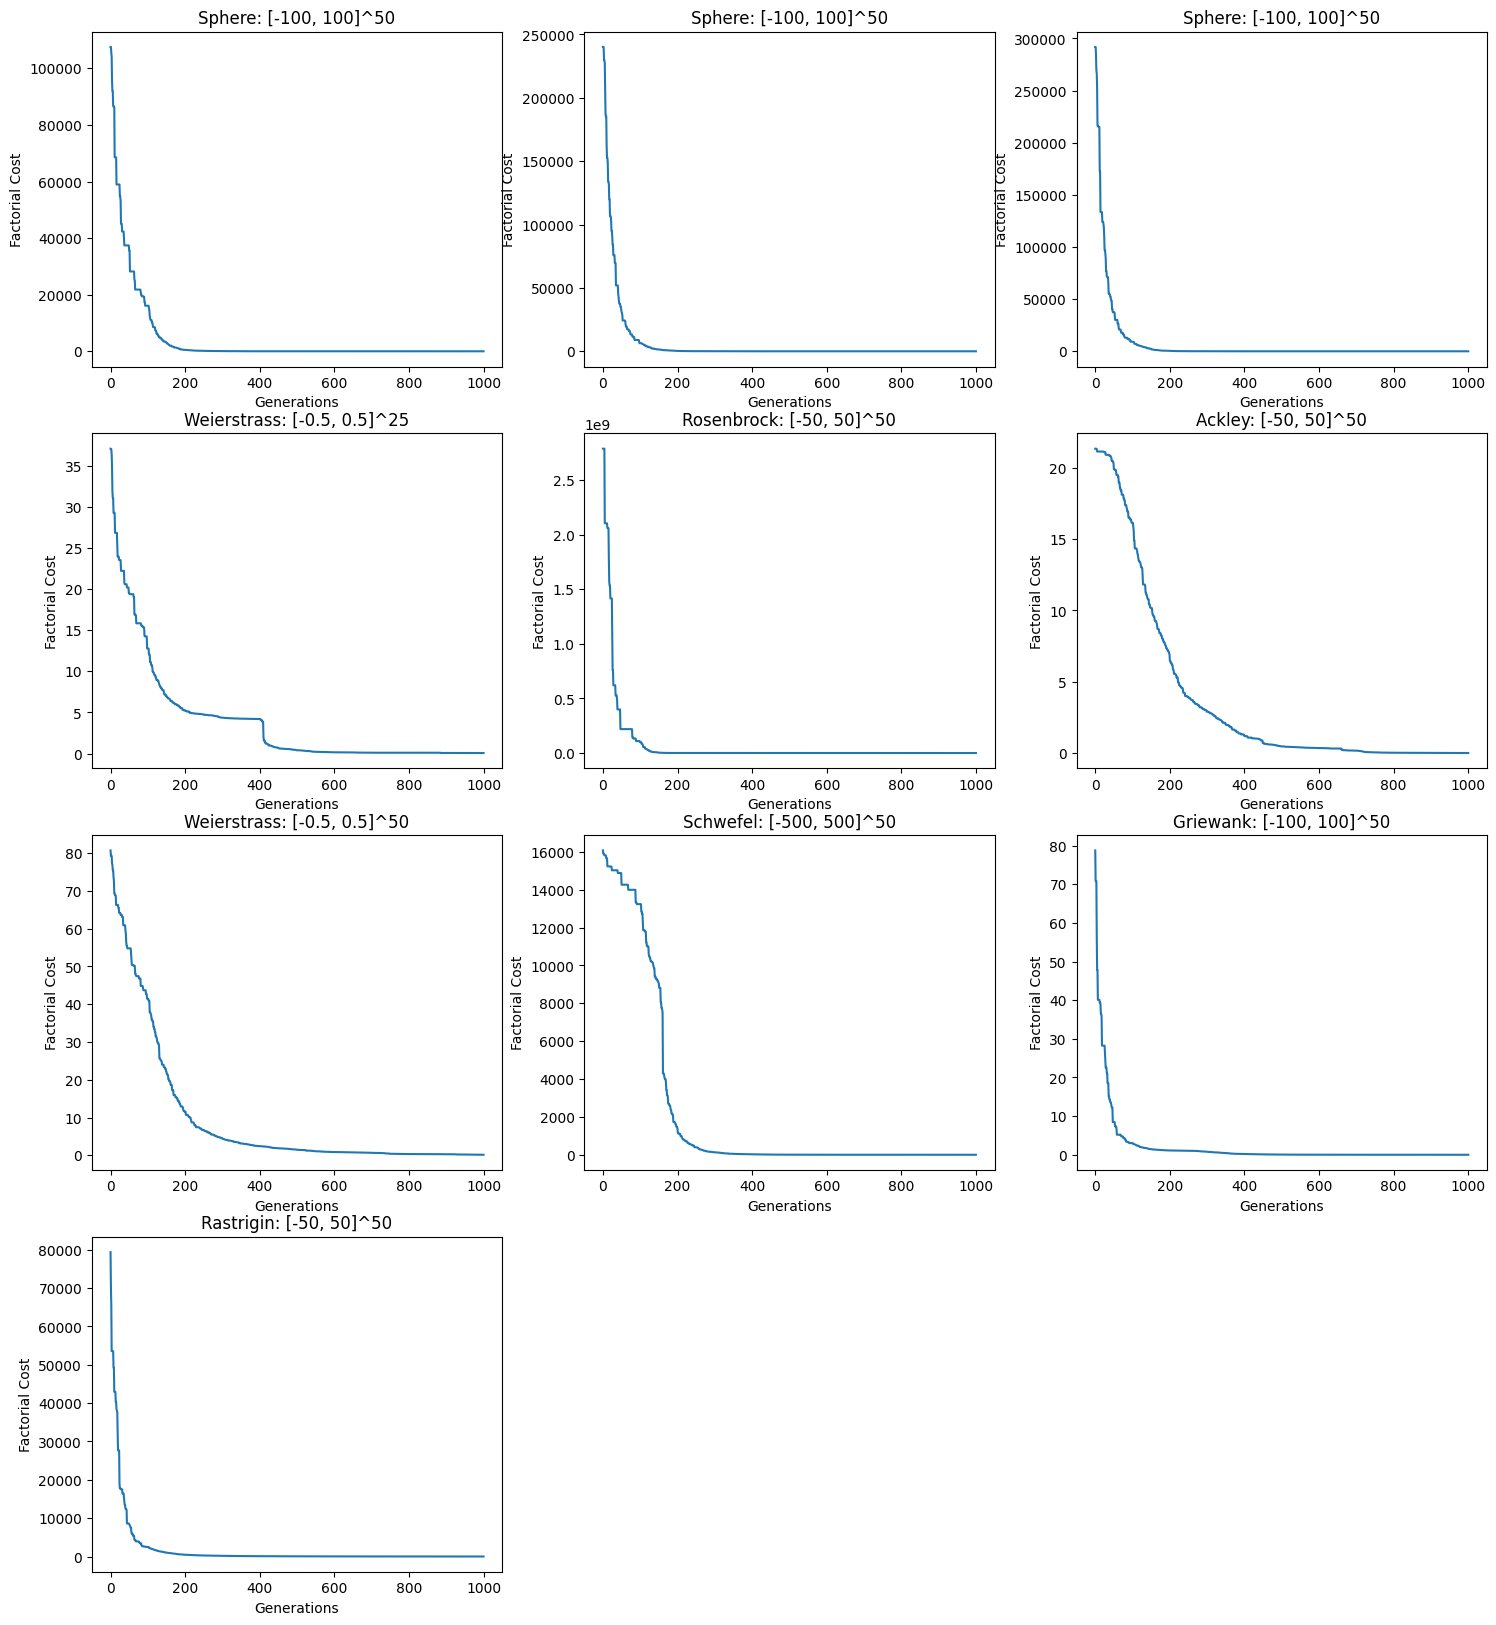

In [3]:
baseModel.render_history()

gnbg